In [ ]:
# Cell 1 - Import required libraries and set configurations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context('notebook', font_scale=1.2)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

PROJECT_ROOT = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()

In [4]:
# Cell 2 - Load dataset and display initial information
data_path = PROJECT_ROOT / 'data' / 'raw' / 'Superstore_Dataset.csv'
try:
    df = pd.read_csv(data_path, parse_dates=['Order Date', 'Ship Date'], encoding='windows-1252')
    print('Dataset loaded successfully.')
except FileNotFoundError:
    print(f'Error: {data_path} not found. Ensure the dataset is in data/raw/.')
    raise
except UnicodeDecodeError:
    print(f'Error: Unable to decode {data_path} with windows-1252. Trying latin1...')
    df = pd.read_csv(data_path, parse_dates=['Order Date', 'Ship Date'], encoding='latin1')
    print('Dataset loaded successfully with latin1 encoding.')

print('\nDataset Info:')
df.info()

print('\nFirst 5 Rows:')
display(df.head())

Dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [5]:
# Cell 3 - Calculate and display summary statistics
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
print('\nSummary Statistics for Numerical Columns:')
display(df[numerical_cols].describe().T)

categorical_cols = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
print('\nUnique Value Counts for Categorical Columns:')
for col in categorical_cols:
    print(f'{col}: {df[col].nunique()} unique values')


Summary Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
Sales,9994.00,229.86,623.25,0.44,17.28,54.49,209.94,22638.48
Quantity,9994.00,3.79,2.23,1.00,2.00,3.00,5.00,14.00
Discount,9994.00,0.16,0.21,0.00,0.00,0.20,0.20,0.80
Profit,9994.00,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98



Unique Value Counts for Categorical Columns:
Ship Mode: 4 unique values
Segment: 3 unique values
Country: 1 unique values
Region: 4 unique values
Category: 3 unique values
Sub-Category: 17 unique values


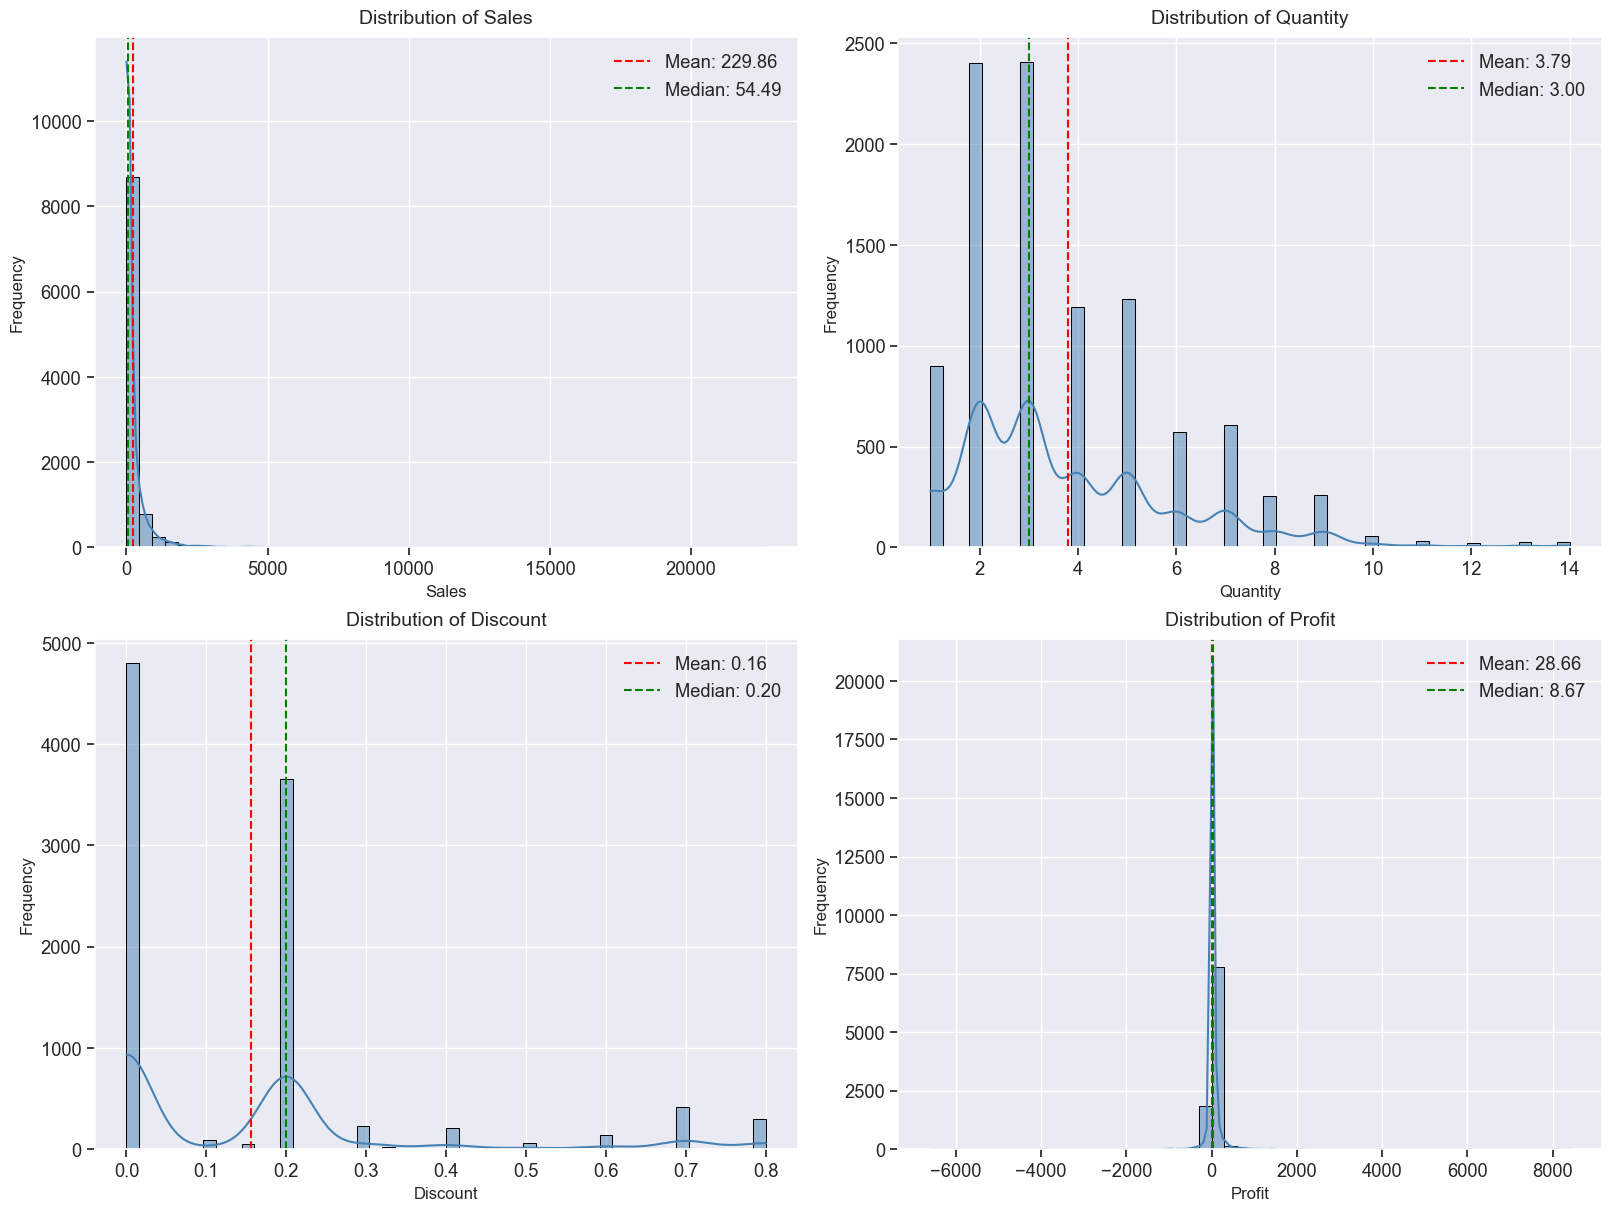

In [6]:
# Cell 4 - Visualize distributions of numerical columns
def plot_distribution(data, column, title, ax):
    sns.histplot(data[column], bins=50, kde=True, ax=ax, color='steelblue')
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    mean_val = data[column].mean()
    median_val = data[column].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    ax.legend()

fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    plot_distribution(df, col, f'Distribution of {col}', axes[idx])

plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/rd/v7chfg_s48s67l7bpbm9w9180000gn/T/ipykernel_26248/3059382352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], ax=ax, order=data[column].value_counts().index, palette='viridis')
/var/folders/rd/v7chfg_s48s67l7bpbm9w9180000gn/T/ipykernel_26248/3059382352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], ax=ax, order=data[column].value_counts().index, palette='viridis')
/var/folders/rd/v7chfg_s48s67l7bpbm9w9180000gn/T/ipykernel_26248/3059382352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.c

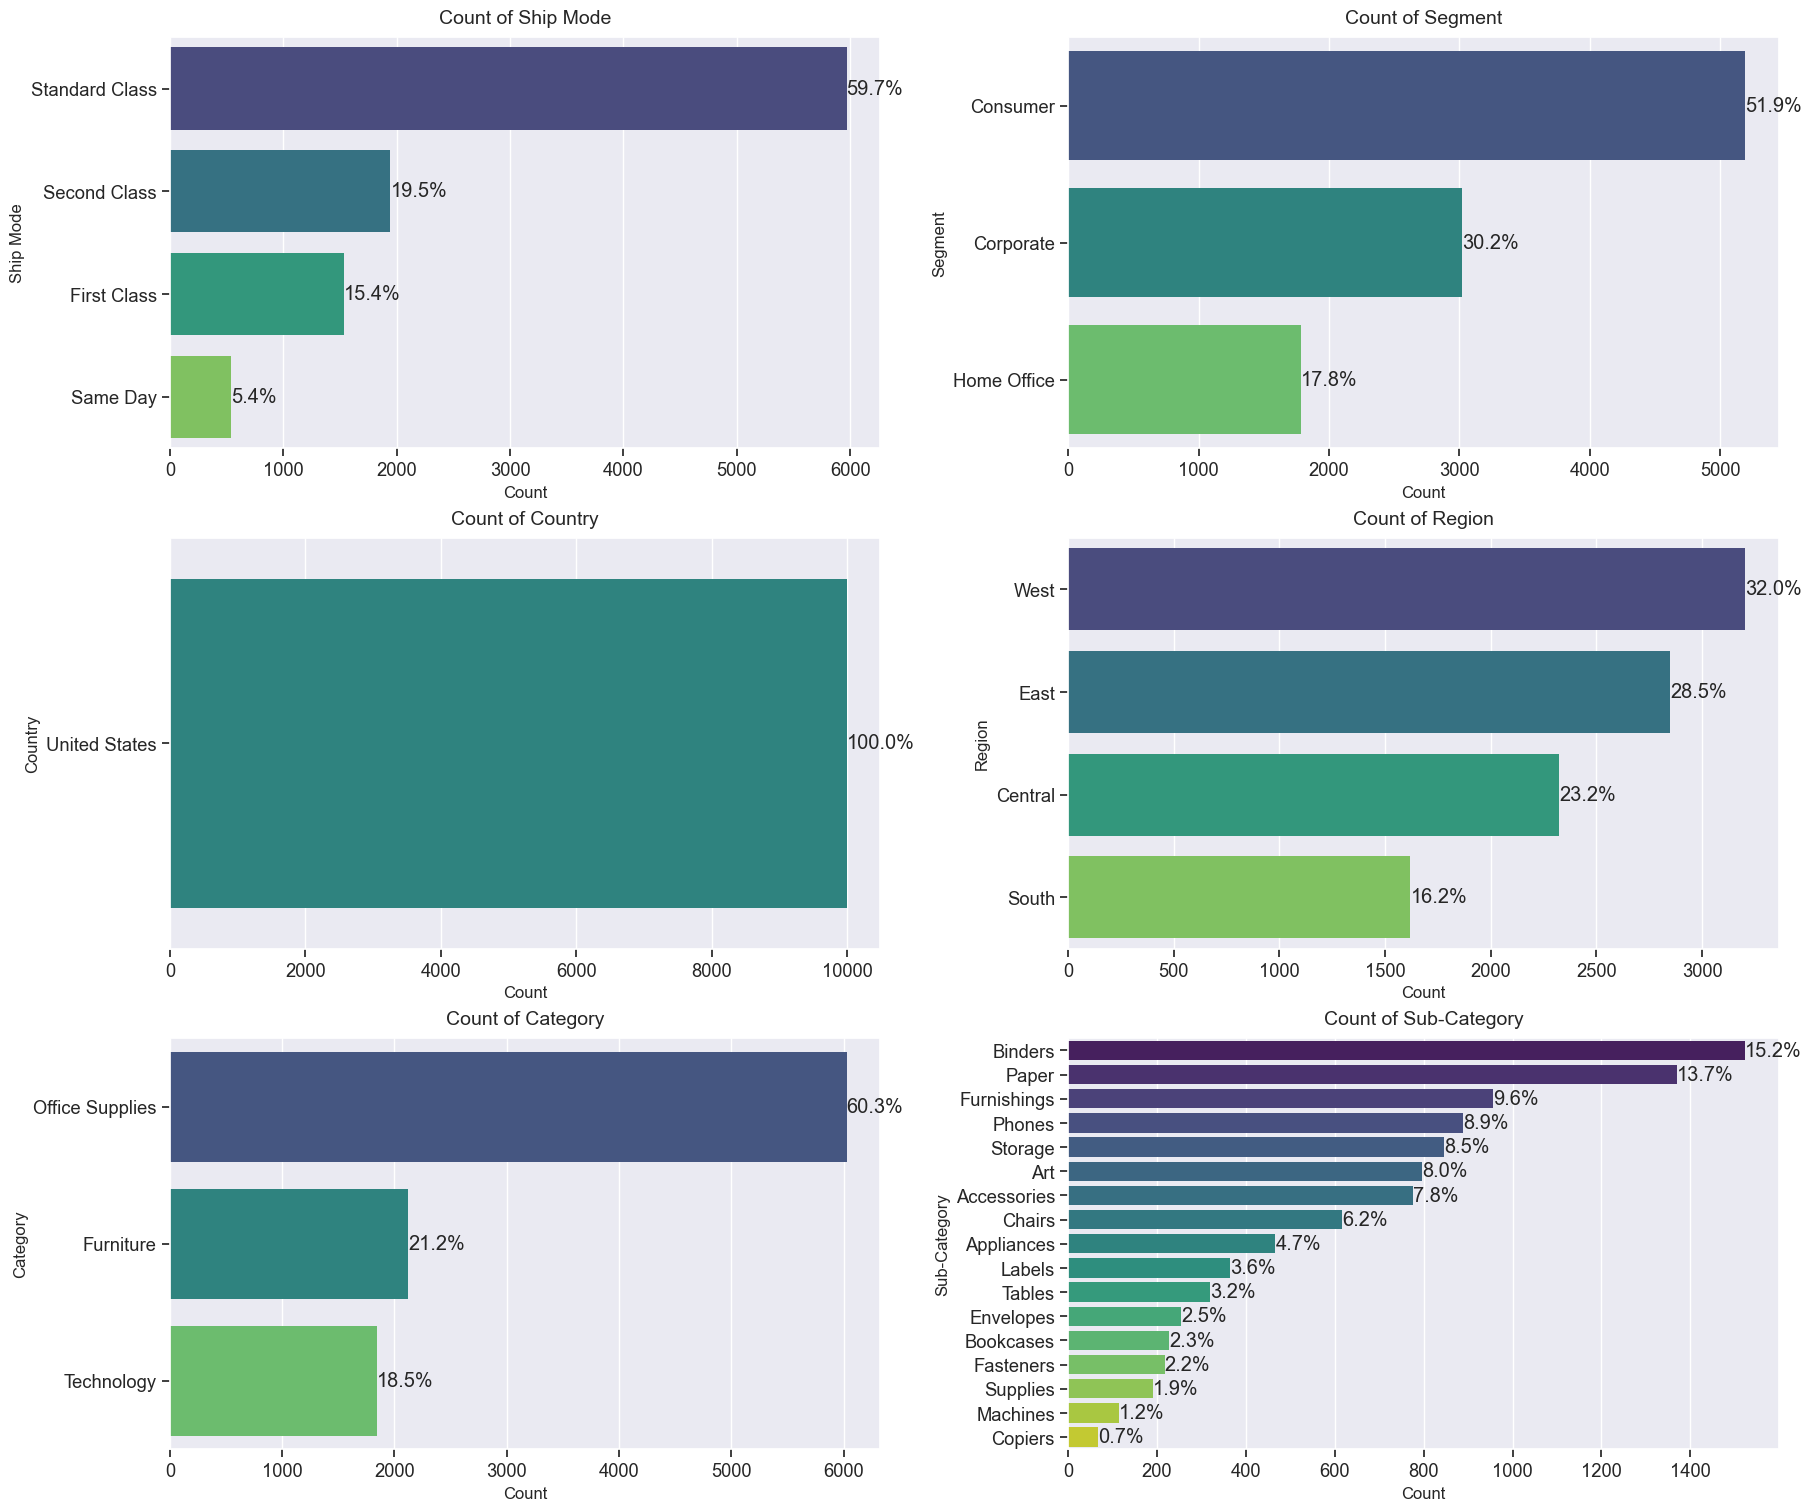

In [7]:
# Cell 5 - Analyze and plot categorical variable counts
def plot_categorical_counts(data, column, ax, title):
    sns.countplot(y=data[column], ax=ax, order=data[column].value_counts().index, palette='viridis')
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel(column, fontsize=12)
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='left', va='center')

fig, axes = plt.subplots(3, 2, figsize=(18, 15), constrained_layout=True)
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    plot_categorical_counts(df, col, axes[idx], f'Count of {col}')

plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'categorical_counts.png', dpi=300, bbox_inches='tight')
plt.show()

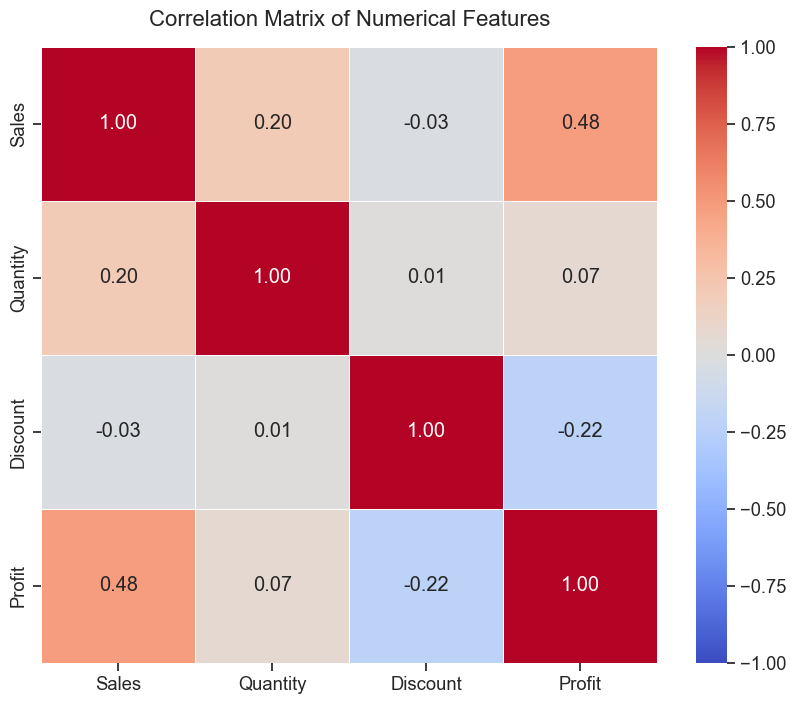

In [8]:
# Cell 6 - Generate correlation matrix heatmap
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=15)

plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

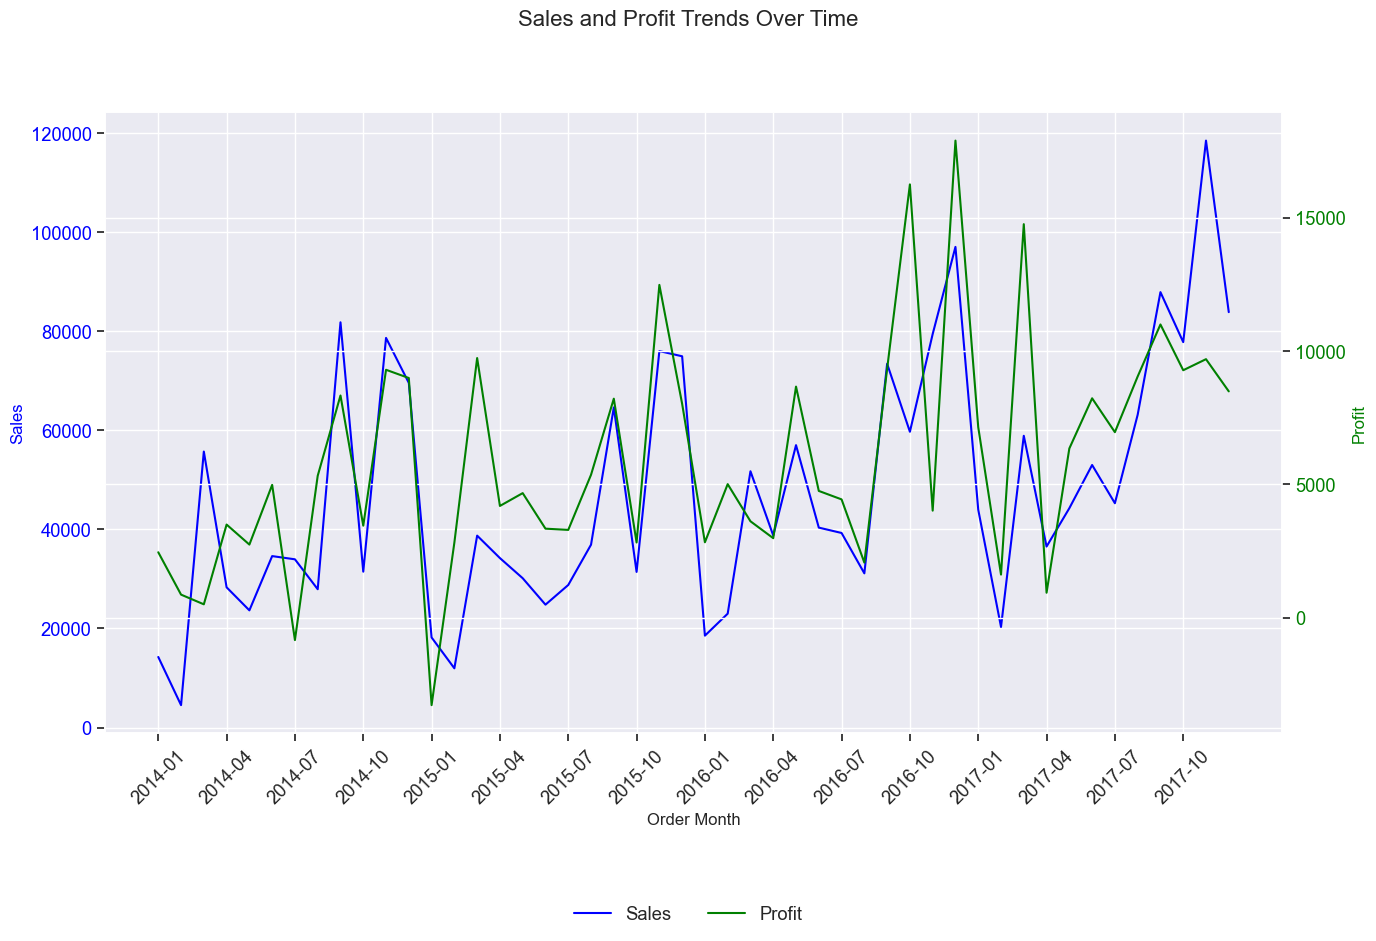

In [9]:
# Cell 7 - Explore and plot sales and profit trends over time
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period('M')

monthly_data = df.groupby('Order Month').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
monthly_data['Order Month'] = monthly_data['Order Month'].astype(str)

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(monthly_data['Order Month'], monthly_data['Sales'], color='blue', label='Sales')
ax1.set_xlabel('Order Month', fontsize=12)
ax1.set_ylabel('Sales', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(0, len(monthly_data), 3))
ax1.set_xticklabels(monthly_data['Order Month'][::3], rotation=45)

ax2 = ax1.twinx()
ax2.plot(monthly_data['Order Month'], monthly_data['Profit'], color='green', label='Profit')
ax2.set_ylabel('Profit', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle('Sales and Profit Trends Over Time', fontsize=16, y=1.05)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()

plt.savefig(PROJECT_ROOT / 'results' / 'figures' / 'sales_profit_trends.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Cell 8 - Print key observations with references to exploration results
print("\nKey Observations:")

# Reference Cell 4: Distributions
sales_skew = df['Sales'].skew()
profit_skew = df['Profit'].skew()
print(f"- Distributions: Sales (skewness: {sales_skew:.2f}) and Profit (skewness: {profit_skew:.2f}) "
      "show right-skewed distributions, indicating outliers (see histograms in Cell 4).")

# Reference Cell 5: Categorical
top_ship_mode = df['Ship Mode'].mode()[0]
top_segment = df['Segment'].mode()[0]
top_region = df['Region'].mode()[0]
print(f"- Categorical: Most orders use {top_ship_mode} shipping, are in the {top_segment} segment, "
      f"and from the {top_region} region (see bar plots in Cell 5).")

# Reference Cell 6: Correlations
sales_profit_corr = df['Sales'].corr(df['Profit'])
print(f"- Correlations: Sales and Profit have a moderate positive correlation of {sales_profit_corr:.2f} "
      "(see heatmap in Cell 6).")

# Reference Cell 7: Trends
monthly_sales_std = monthly_data['Sales'].std()
monthly_profit_std = monthly_data['Profit'].std()
print(f"- Trends: Sales (std: {monthly_sales_std:.2f}) and Profit (std: {monthly_profit_std:.2f}) "
      "fluctuate over time, with potential seasonal patterns (see time series plot in Cell 7).")


Key Observations:
- Distributions: Sales (skewness: 12.97) and Profit (skewness: 7.56) show right-skewed distributions, indicating outliers (see histograms in Cell 4).
- Categorical: Most orders use Standard Class shipping, are in the Consumer segment, and from the West region (see bar plots in Cell 5).
- Correlations: Sales and Profit have a moderate positive correlation of 0.48 (see heatmap in Cell 6).
- Trends: Sales (std: 25195.89) and Profit (std: 4288.70) fluctuate over time, with potential seasonal patterns (see time series plot in Cell 7).
